# Анализ бизнес-показателей приложения Procrastinate Pro+

**Цель исследования:** выявить причины падения доходов за последние несколько месяцев, а также найти точки роста для вывода бизнеса "в плюс".

**Исходные данные:** 
- лог сервера с данными об их посещениях `visits_info_short.csv`, где
    - `User Id` — уникальный идентификатор пользователя,
    - `Region` — страна пользователя
    - `Device` — тип устройства пользователя
    - `Channel` — идентификатор источника перехода
    - `Session Start` — дата и время начала сессии
    - `Session End` — дата и время окончания сессии
    
    
- выгрузка их покупок за этот период `orders_info_short.csv`, где
    - `User Id` — уникальный идентификатор пользователя
    - `Event Dt` — дата и время покупки
    - `Revenue` — сумма заказа
    
    
- рекламные расходы `costs_info_short.csv`, где
    - `dt` — дата проведения рекламной кампании
    - `Channel` — идентификатор рекламного источника
    - `costs` — расходы на эту кампанию

**Основные этапы исследования:**
1. Загрузка и проведение первичного обзора данных.
2. Переработка данных для последующего анализа: редактирование названий столбцов, поиск пропусокв и аномалий.
3. Исследовательский анализ данных. На этом этапе составляются профили пользователей, определяется максимальная и минимальная даты их привлечения. Анализ распределения пользователей по категориям: каналы привлечения, страны, устройства.
4. Маркетинг. Определение общей суммы расходов, её распределения по рекламным источникам. Изучение динамики САС.
5. Расчет LTV, ROI и CAC, анализ конверсии, удержания пользователей и окупаемости рекламы с разбивкой по категориям.
6. Выводы по исследованию.

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Первичный-обзор-данных" data-toc-modified-id="Первичный-обзор-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Первичный обзор данных</a></span></li><li><span><a href="#Переработка-данных" data-toc-modified-id="Переработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Переработка данных</a></span></li><li><span><a href="#Функции-для-расчёта-и-анализа-LTV,-ROI,-удержания-и-конверсии" data-toc-modified-id="Функции-для-расчёта-и-анализа-LTV,-ROI,-удержания-и-конверсии-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Функции для расчёта и анализа LTV, ROI, удержания и конверсии</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Составление-профилей-пользователей" data-toc-modified-id="Составление-профилей-пользователей-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Составление профилей пользователей</a></span></li><li><span><a href="#Распределение-пользователей-по-странам" data-toc-modified-id="Распределение-пользователей-по-странам-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Распределение пользователей по странам</a></span></li><li><span><a href="#Распределение-пользователей-по-устройствам" data-toc-modified-id="Распределение-пользователей-по-устройствам-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Распределение пользователей по устройствам</a></span></li><li><span><a href="#Распределение-пользователей-по-каналам-привлечения" data-toc-modified-id="Распределение-пользователей-по-каналам-привлечения-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Распределение пользователей по каналам привлечения</a></span></li></ul></li><li><span><a href="#Маркетинг" data-toc-modified-id="Маркетинг-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Маркетинг</a></span><ul class="toc-item"><li><span><a href="#Распределения-трат-по-источникам" data-toc-modified-id="Распределения-трат-по-источникам-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Распределения трат по источникам</a></span></li><li><span><a href="#Средняя-стоимость-привлечения-одного-пользователя" data-toc-modified-id="Средняя-стоимость-привлечения-одного-пользователя-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Средняя стоимость привлечения одного пользователя</a></span></li><li><span><a href="#Динамика-САС-по-каналам-привлечения" data-toc-modified-id="Динамика-САС-по-каналам-привлечения-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Динамика САС по каналам привлечения</a></span></li></ul></li><li><span><a href="#Оценка-окупаемости-рекламы" data-toc-modified-id="Оценка-окупаемости-рекламы-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Оценка окупаемости рекламы</a></span><ul class="toc-item"><li><span><a href="#Исследование-окупаемости-рекламы" data-toc-modified-id="Исследование-окупаемости-рекламы-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Исследование окупаемости рекламы</a></span></li><li><span><a href="#Исследование-конверсии-и-удержания-пользователей" data-toc-modified-id="Исследование-конверсии-и-удержания-пользователей-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Исследование конверсии и удержания пользователей</a></span></li><li><span><a href="#Окупаемость-рекламы-с-разбивкой-по-устройствам" data-toc-modified-id="Окупаемость-рекламы-с-разбивкой-по-устройствам-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Окупаемость рекламы с разбивкой по устройствам</a></span></li><li><span><a href="#Окупаемость-рекламы-с-разбивкой-по-странам" data-toc-modified-id="Окупаемость-рекламы-с-разбивкой-по-странам-6.4"><span class="toc-item-num">6.4&nbsp;&nbsp;</span>Окупаемость рекламы с разбивкой по странам</a></span></li><li><span><a href="#Окупаемость-рекламы-с-разбивкой-по-рекламным-каналам" data-toc-modified-id="Окупаемость-рекламы-с-разбивкой-по-рекламным-каналам-6.5"><span class="toc-item-num">6.5&nbsp;&nbsp;</span>Окупаемость рекламы с разбивкой по рекламным каналам</a></span></li></ul></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Выводы</a></span></li></ul></div>

## Первичный обзор данных

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

In [2]:
try:
    visits = pd.read_csv('visits_info_short.csv')
except:
    visits = pd.read_csv('https://code.s3.yandex.net/datasets/visits_info_short.csv')
    
visits.info()
visits.head() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


In [3]:
try:
    orders = pd.read_csv('orders_info_short.csv')
except:
    orders = pd.read_csv('https://code.s3.yandex.net/datasets/orders_info_short.csv')
    
orders.info()
orders.head() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


In [4]:
try:
    costs = pd.read_csv('costs_info_short.csv')
except:
    costs = pd.read_csv('https://code.s3.yandex.net/datasets/costs_info_short.csv')
    
costs.info()
costs.head() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


**Промежуточные итоги:** датасеты с информацией о посещениях, покупках и расходах на рекламу не содержат пропусков. Названия столбцов нужно привести к змеиному регистру, а данные о дате и времени - перевести в соответствующий формат. Кроме того, датасеты нужно проверить на наличие дубликатов, а также аномалий и выбросов.

## Переработка данных

In [5]:
# приведение к нижнему регистру
visits.columns = ['user_id', 'region', 'device', 'channel', 'session_start',
       'session_end']
orders.columns = ['user_id', 'event_dt', 'revenue']
costs.columns = costs.columns.str.lower()

In [6]:
# изменение формата столбцов
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])
orders['event_dt'] = pd.to_datetime(orders['event_dt'])
costs['dt'] = pd.to_datetime(costs['dt']).dt.date

In [7]:
# проверка на наличие дубликатов
print('Дубликатов в таблице с посещениями:', visits.duplicated().sum())
print('Дубликатов в таблице с заказами:', orders.duplicated().sum())
print('Дубликатов в таблице с рекламными расходами:', costs.duplicated().sum())

# проверка на наличие неявных дубликатов
costs['channel'].unique()
visits['device'].unique()
visits['channel'].unique()

Дубликатов в таблице с посещениями: 0
Дубликатов в таблице с заказами: 0
Дубликатов в таблице с рекламными расходами: 0


array(['organic', 'TipTop', 'RocketSuperAds', 'YRabbit', 'FaceBoom',
       'MediaTornado', 'AdNonSense', 'LeapBob', 'WahooNetBanner',
       'OppleCreativeMedia', 'lambdaMediaAds'], dtype=object)

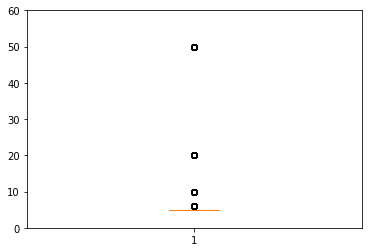

In [8]:
# проверим данные на выбросы
plt.boxplot(orders['revenue']);
plt.ylim(0, 60)
orders['revenue'].describe()

#видимо, в части крупных заказах ошибка, 49.9 на самом деле является 4.99
orders.loc[orders['revenue'] > 5, 'revenue'] = orders['revenue']/10


count    1800.000000
mean       58.609611
std       107.740223
min         0.800000
25%         6.495000
50%        12.285000
75%        33.600000
max       630.000000
Name: costs, dtype: float64

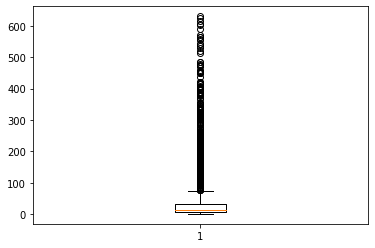

In [9]:
plt.boxplot(costs['costs'])
costs['costs'].describe()

Названия столбцов приведены к единому стилю, изменен тип столбцов с датой. В данных не было обнаружено дубликатов. В `orders['revenue']` были выявлены и исправлены ошибки с выбросами: был указан неверный порядок суммы (49.9 вместо 4.99). Большое количество выбросов в `costs['costs']` можно объяснить высокими затратами на рекламу в одном из источников (TipTop).

## Функции для расчёта и анализа LTV, ROI, удержания и конверсии

Функции для вычисления значений метрик:

- `get_profiles()` — для создания профилей пользователей
- `get_retention()` — для подсчёта Retention Rate
- `get_conversion()` — для подсчёта конверсии
- `get_ltv()` — для подсчёта LTV и ROI

Функции для построения графиков:

- `filter_data()` — для сглаживания данных
- `plot_retention()` — для построения графика Retention Rate
- `plot_conversion()` — для построения графика конверсии
- `plot_ltv_roi` — для визуализации LTV и ROI

**Функции для вычисления метрик**

In [10]:
# функция для создания пользовательских профилей

def get_profiles(sessions, orders, ad_costs):

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # добавляем флаги для всех событий из event_names
    #for event in event_names:
    #    if event in events['event_name'].unique():
    #        profiles[event] = profiles['user_id'].isin(
    #            events.query('event_name == @event')['user_id'].unique()
    #        )

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left'
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

In [11]:
# функция для расчёта удержания

def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

In [12]:

# функция для расчёта конверсии

def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

In [13]:
# функция для расчёта LTV и ROI

def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )

**Функции для визуализации:**

In [14]:
# функция для сглаживания фрейма

def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df

In [15]:
# функция для визуализации удержания

def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show()

In [16]:
# функция для визуализации конверсии

def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

In [17]:
# функция для визуализации LTV и ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

## Исследовательский анализ данных

### Составление профилей пользователей 

In [18]:
profiles = get_profiles(visits, orders, costs)
print('Первая запись от', profiles['first_ts'].min())
print('Последняя запись от', profiles['first_ts'].max())
profiles.head()

Первая запись от 2019-05-01 00:00:41
Последняя запись от 2019-10-27 23:59:04


,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769


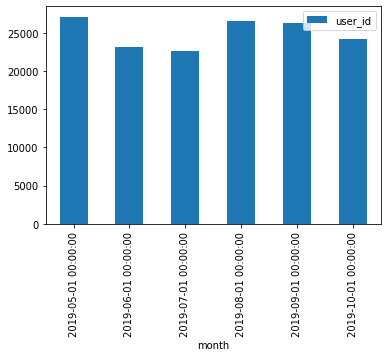

In [19]:
profiles.groupby('month').agg({'user_id':'nunique'}).plot.bar();

Первая запись в датафрейме идет от 2019-05-01 00:00:41 и заканчивается 2019-10-27 в 23:59:04. В целом новые пользователи распределены по месяцам равномерно, но в июне и июле их пришло меньше, чем в другие месяцы. 

### Распределение пользователей по странам

In [20]:
# создадим функцию, которая будет рассчитывать количество платящих пользователей
# в разбивках по нужной категории (страна, устройство и тд.) и выводить графики
# процента платящих пользователей отностительно категории, а также общую разбивку
# платящих по категориям

def get_stats_about_users(column):
    data = profiles.pivot_table(index = column, 
                                columns = 'payer', 
                                values = 'user_id', 
                                aggfunc = 'nunique')
    data.columns = ['payer_no', 'payer_yes']
    data['total'] = data['payer_yes'] + data['payer_no']
    data['payer_percent'] = round(data['payer_yes'] / data['total'] * 100, 3)
    data['payer_of_all'] = round(data['payer_yes'] / sum(data['payer_yes']) * 100, 3)
    display(data)
    
    #строим графики
    plt.figure(figsize=(15, 5))
    ax1 = plt.subplot(1, 2, 1)
    data.plot.bar(y = 'payer_percent', grid = True, ax = ax1)
    plt.title(f'Процент платящих по {column}')
    plt.ylim(round(data['payer_percent'].min()) - 1, round(data['payer_percent'].max()) + 1)
    
    ax2 = plt.subplot(1, 2, 2)
    my_circle = plt.Circle((0,0), 0.7, color = 'white')
    plt.pie(data['payer_of_all'], 
            labels = data.index, 
            wedgeprops = {'linewidth':2, 'edgecolor':'white'}, 
            colors = sns.color_palette("husl", 12))
    p = plt.gcf()
    p.gca().add_artist(my_circle)
    plt.title(f'Распределение платящих пользователей по {column}');

,payer_no,payer_yes,total,payer_percent,payer_of_all
region,,,,,
France,16787,663,17450,3.799,7.465
Germany,14365,616,14981,4.112,6.936
UK,16875,700,17575,3.983,7.882
United States,93100,6902,100002,6.902,77.716


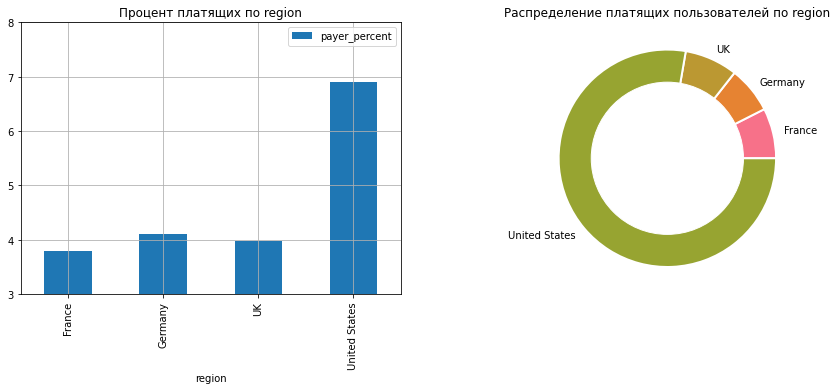

In [21]:
column = 'region'
get_stats_about_users(column)

- Как видно по графикам, относительно всех пользователей в регионе больше США, там доля платящих достигает почти 7%. В остальных регионах пользователи платят меньше - порядка 4%.
- Основная масса платящих пользователей относительно всех пользователей приложения сосредоточена в США и составляет порядка 77%. Пользователи по другим регионам распределены равномерно, примерно по 4 ± 2%.

### Распределение пользователей по устройствам

,payer_no,payer_yes,total,payer_percent,payer_of_all
device,,,,,
Android,32982,2050,35032,5.852,23.083
Mac,28130,1912,30042,6.364,21.529
PC,28918,1537,30455,5.047,17.307
iPhone,51097,3382,54479,6.208,38.081


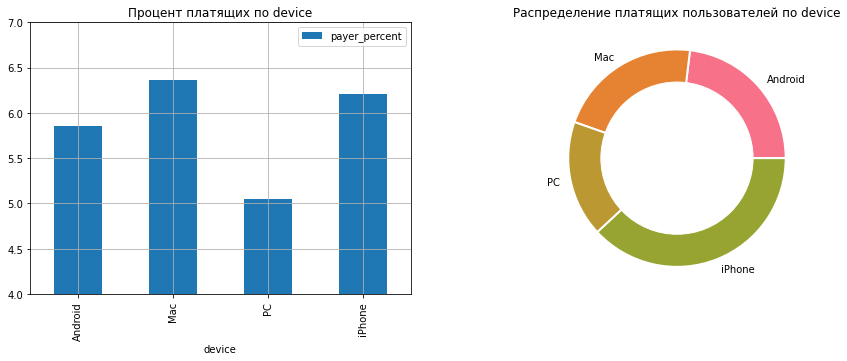

In [22]:
column = 'device'
get_stats_about_users(column)

- Разброс платящих пользователей по устройствам ещё меньше, чем по странам. По количеству платящих пользователей лидирует iPhone (38%), далее  идут Android (23.4%), PC и Maс.

### Распределение пользователей по каналам привлечения

,payer_no,payer_yes,total,payer_percent,payer_of_all
channel,,,,,
AdNonSense,3440,440,3880,11.340,4.954
FaceBoom,25587,3557,29144,12.205,40.052
LeapBob,8291,262,8553,3.063,2.950
MediaTornado,4208,156,4364,3.575,1.757
OppleCreativeMedia,8372,233,8605,2.708,2.624
RocketSuperAds,4096,352,4448,7.914,3.964
TipTop,17683,1878,19561,9.601,21.146
WahooNetBanner,8100,453,8553,5.296,5.101
YRabbit,4147,165,4312,3.827,1.858


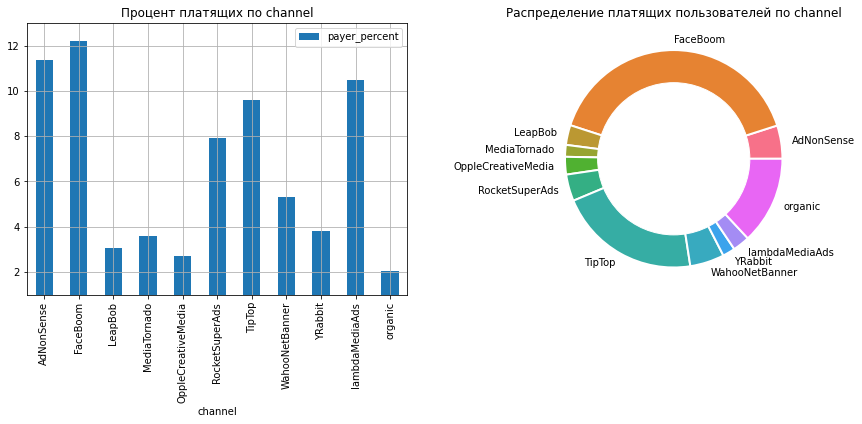

In [23]:
column = 'channel'
get_stats_about_users(column)

- Каналы привлечения демонстрируют гораздо больший разброс процента платящих пользователей, разница между лидирующим источником и самым последним составляет порядка 10%. Лучше всего платят пользователи из источников AdNonSense, FaceBoom, lambdaMediaAds, среди них платях более 10%. Меньше всего платят органические пользователи, а также пользователи из источников OppleCreativeMedia, LeapBob, MediaTornado и YRabbit.


- По распределению платящих пользователей относительно общей их массы лидируют каналы привлечения FaceBoom и TipTop, далее идут органические пользователи. 

## Маркетинг

In [24]:
sum_costs = costs['costs'].sum().astype('int')
print('Общая сумма расходов на маркетинг составляет', sum_costs)

Общая сумма расходов на маркетинг составляет 105497


### Распределения трат по источникам

In [25]:
costs_per_souce = costs.groupby('channel').agg({'costs':'sum'}).sort_values(by = 'costs', ascending = False)
costs_per_souce.head()

,costs
channel,
TipTop,54751.30
FaceBoom,32445.60
WahooNetBanner,5151.00
AdNonSense,3911.25
OppleCreativeMedia,2151.25


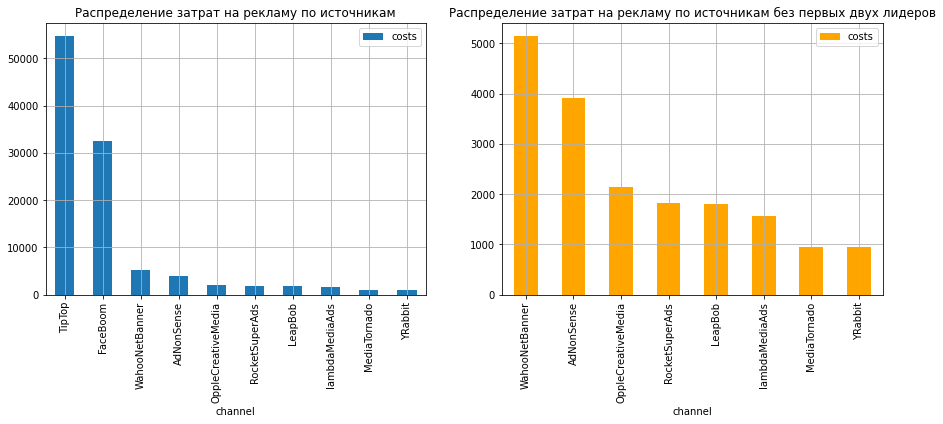

In [26]:
plt.figure(figsize=(15, 5))
ax1 = plt.subplot(1, 2, 1)
costs_per_souce.plot.bar(grid = True, ax = ax1)
plt.title('Распределение затрат на рекламу по источникам')
ax2 = plt.subplot(1, 2, 2)
costs_per_souce.tail(8).plot.bar(grid = True, ax = ax2, color = 'orange')
plt.title('Распределение затрат на рекламу по источникам без первых двух лидеров'); 

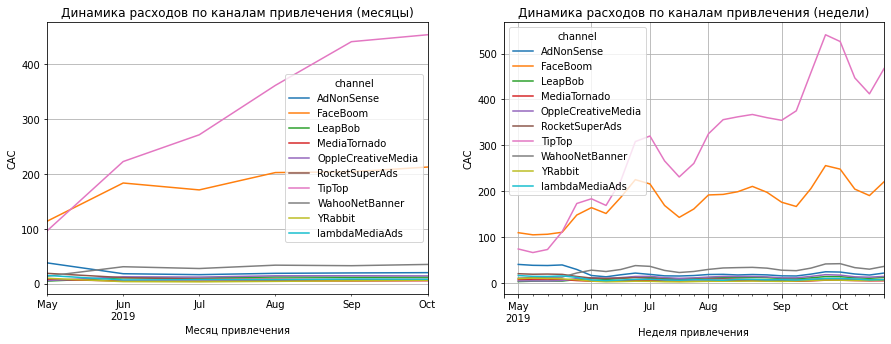

In [27]:
costs['dt_week'] = costs['dt'].astype('datetime64[W]')
costs['dt_month'] = costs['dt'].astype('datetime64[M]')
SAS_channel_week = costs.pivot_table(index = 'dt_week', 
                                       columns = 'channel', 
                                       values = 'costs')

SAS_channel_month = costs.pivot_table(index = 'dt_month', 
                                   columns = 'channel', 
                                   values = 'costs')


plt.figure(figsize=(15, 5))
ax1 = plt.subplot(1, 2, 1)
filter_data(SAS_channel_month, 1).plot(grid = True, ax = ax1)
plt.ylabel('CAC')
plt.xlabel('Месяц привлечения')
plt.title('Динамика расходов по каналам привлечения (месяцы)')

ax2 = plt.subplot(1, 2, 2)
filter_data(SAS_channel_week, 2).plot(grid = True, ax = ax2)
plt.ylabel('CAC')
plt.xlabel('Неделя привлечения')
plt.title('Динамика расходов по каналам привлечения (недели)');

### Средняя стоимость привлечения одного пользователя

In [28]:
costs_per_souce_mean = (
    profiles.groupby('channel')
    .agg({'acquisition_cost':'mean'})
    .sort_values(by = 'acquisition_cost', ascending = False))
costs_per_souce_mean

,acquisition_cost
channel,
TipTop,2.799003
FaceBoom,1.113286
AdNonSense,1.008054
lambdaMediaAds,0.724802
WahooNetBanner,0.602245
RocketSuperAds,0.412095
OppleCreativeMedia,0.250000
YRabbit,0.218975
MediaTornado,0.218717


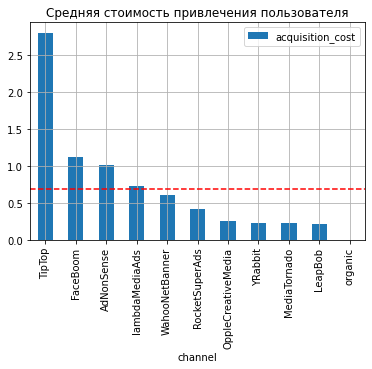

In [29]:
costs_per_souce_mean.plot.bar(grid = True)
plt.title('Средняя стоимость привлечения пользователя')
plt.axhline(y = costs_per_souce_mean['acquisition_cost'].mean(), 
            color='red', linestyle='--', 
            label = 'Средний САС по проекту');

### Динамика САС по каналам привлечения

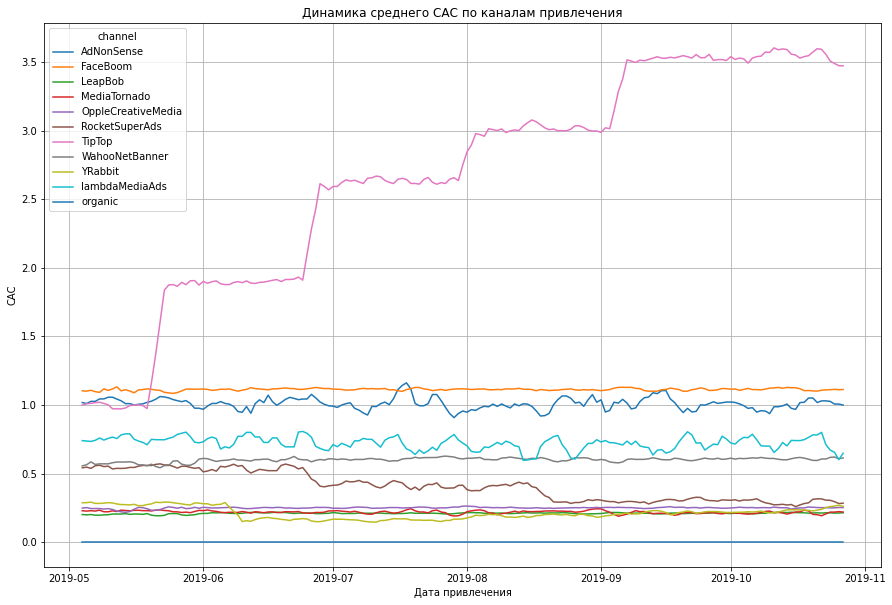

In [30]:
SAS_dynamic = profiles.pivot_table(index = 'dt', 
                                   columns = 'channel', 
                                   values = 'acquisition_cost', 
                                   aggfunc = 'mean')

filter_data(SAS_dynamic, 4).plot(grid = True, figsize = (15, 10))
plt.ylabel('CAC')
plt.xlabel('Дата привлечения')
plt.title('Динамика среднего САС по каналам привлечения')
plt.show()

/tmp/ipykernel_577/33337312.py:3: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  profiles['week'] = pd.DatetimeIndex(profiles['dt']).week


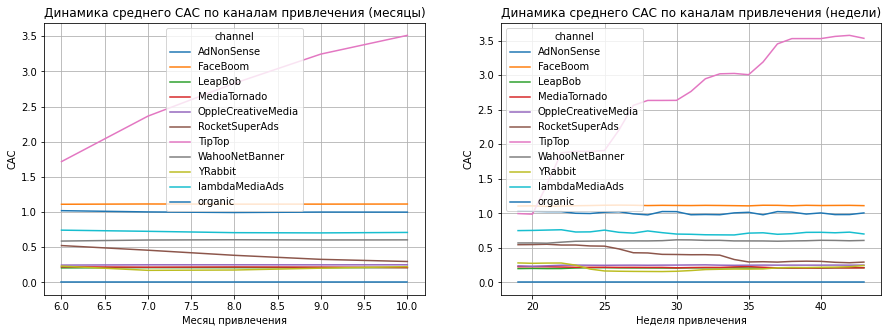

In [31]:
profiles.groupby(['dt', 'channel']).agg({'acquisition_cost':'mean'}).head()
profiles['month'] = pd.DatetimeIndex(profiles['dt']).month
profiles['week'] = pd.DatetimeIndex(profiles['dt']).week
SAS_dynamic_month = profiles.pivot_table(index = 'month', 
                                   columns = 'channel', 
                                   values = 'acquisition_cost', 
                                   aggfunc = 'mean')
SAS_dynamic_week = profiles.pivot_table(index = 'week', 
                                   columns = 'channel', 
                                   values = 'acquisition_cost', 
                                   aggfunc = 'mean')

plt.figure(figsize=(15, 5))
ax1 = plt.subplot(1, 2, 1)
filter_data(SAS_dynamic_month, 2).plot(grid = True, ax = ax1)
plt.ylabel('CAC')
plt.xlabel('Месяц привлечения')
plt.title('Динамика среднего САС по каналам привлечения (месяцы)')

ax2 = plt.subplot(1, 2, 2)
filter_data(SAS_dynamic_week, 2).plot(grid = True, ax = ax2)
plt.ylabel('CAC')
plt.xlabel('Неделя привлечения')
plt.title('Динамика среднего САС по каналам привлечения (недели)');

- Самыми дорогими каналами являются TipTop и FaceBoom (суммарные затраты на рекламу 54 750 и 32 450 соответственно), как мы выяснили ранее, с них приходит больше всего платящих пользователей, однако конвернтируются они в платящх хуже, чем пользователи из других источников. Получается, эти каналы привлечения берут скорее количеством, чем качеством, или же с ростом числа пользователей их конвертация в платящих ухудшается.


- Аналогичную распределению суммарных затрат динамику можно наблюдать и в средней стоимости привлечения пользователя: всё так же лидируют TipTop и FaceBoom, однако разрыв между ними и остальными каналами в несколько раз меньше, чем в суммарных затратах.


- За весь период анализа затраты на рекламу по разным каналам привлечения в целом стабильны, исключая Tip-Top: по графику динамики САС видно, что в среднем раз в месяц его САС резко увеличивается примерно на 0.5. Получается, привлечение пользователей из данного источника становится всё дороже. Из него приходит больше всего пользователей (исключая "органических"), однако доля платящих в нем меньше, чем в большинстве других источников. Возможно, стоит задуматься о расширении рекламной компании на других каналах привлеченеия, однако делать четкие выводы только по этим данным ещё рано.

## Оценка окупаемости рекламы

Используя графики LTV, ROI и CAC, проанализируем окупаемость рекламы. Дата начала анализа - 1 ноября 2019 года, пользователи должны окупаться не позднее чем через две недели после привлечения. Соответственно, горизонт анализа составит 2 недели, а в анализ войдут те пользователи, которые пришли в приложение до 17 октября 2019 года.

In [32]:
observation_date = datetime(2019, 11, 1).date()  # момент анализа
horizon_days = 14  # горизонт анализа 

In [33]:
#исключим "органические" аккаунты
profiles = profiles.query('channel != "organic"')

### Исследование окупаемости рекламы

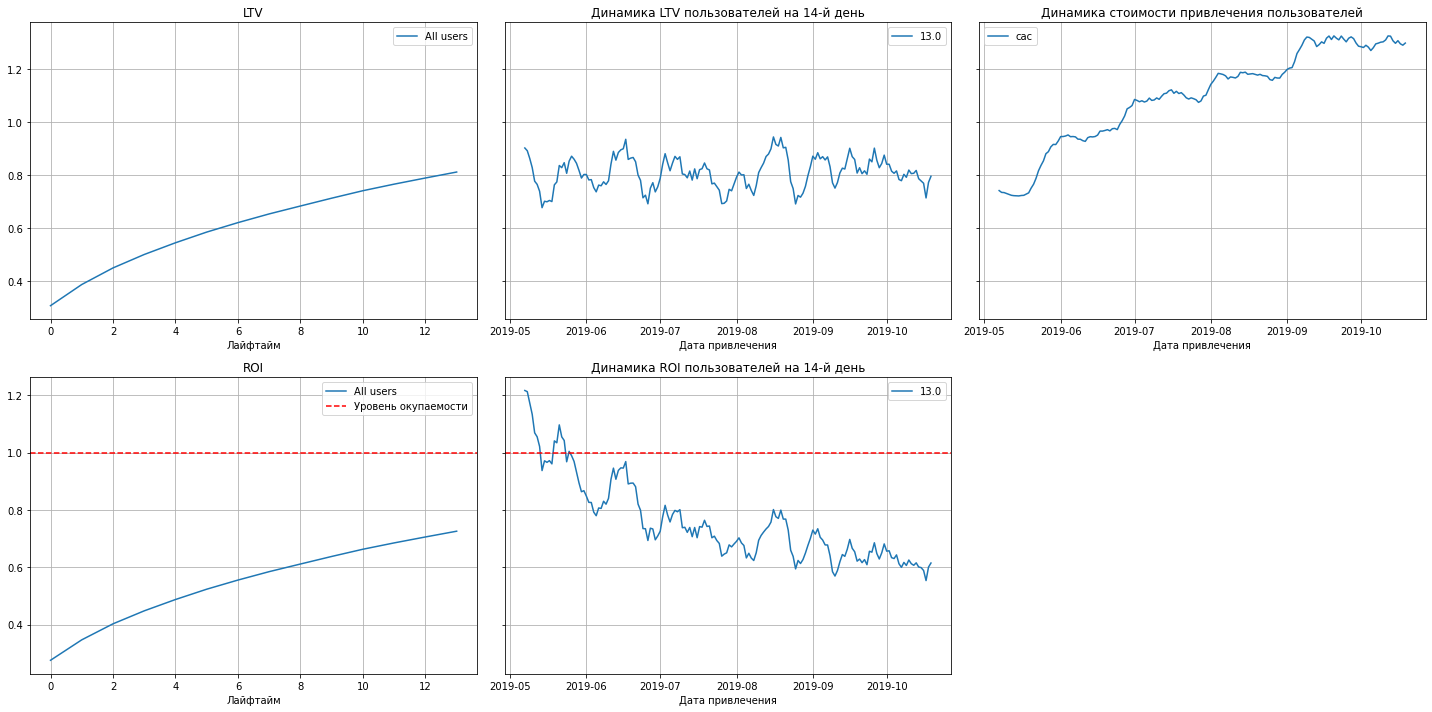

In [34]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days)


plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

- Рекламная компания в целом не окупается: ROI  в конце недели составляет примерно 80%. Его динамика также отрицательная: в начале исследуемого периода (май-июнь) реклама окупалась, однако, начиная с июля, ROI стал ниже 100%. Вероятнее всего это связано с возрастающими затратами на рекламу. 
- LTV подвержен сезонному фактору, но в целом стабилен. Значит, качество пользователей не падает.

### Исследование конверсии и удержания пользователей

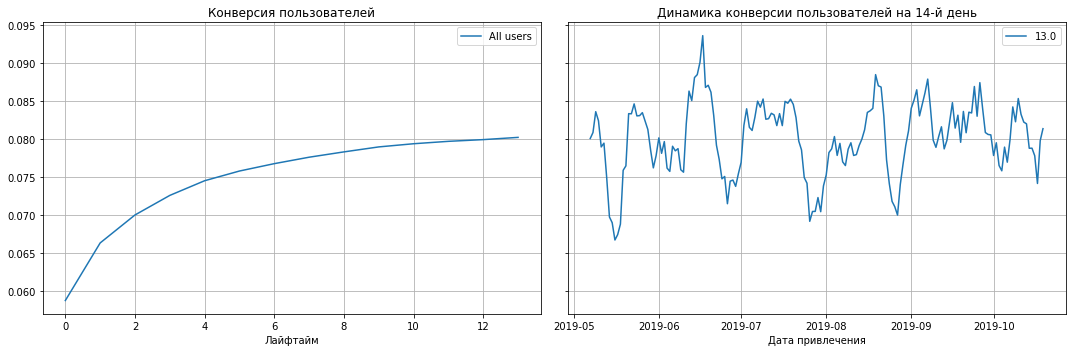

In [35]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

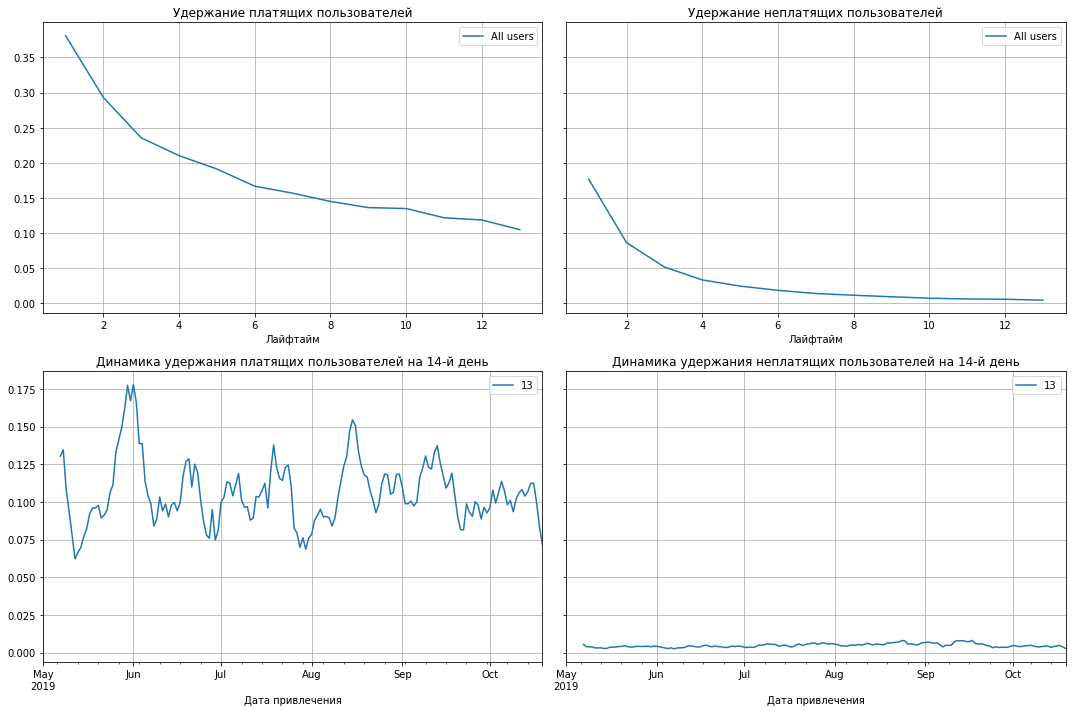

In [36]:
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days)

plot_retention(retention_grouped, retention_history, horizon_days) 

- Конверсия пользователей растет по мере увеличения лайфтайма, однако растет она не линейно: чем больше лайфтайм, тем всё с меньшими темпами увеличивается конверсия. В динамике пользователи конвертируются в платящих в целом стабильно по всему периоду анализа, за исключением мая-июня.
- Удержание платящих пользователей закономерно больше, чем не платящих. В целом оно стабильно по всему периоду анализа.

### Окупаемость рекламы с разбивкой по устройствам

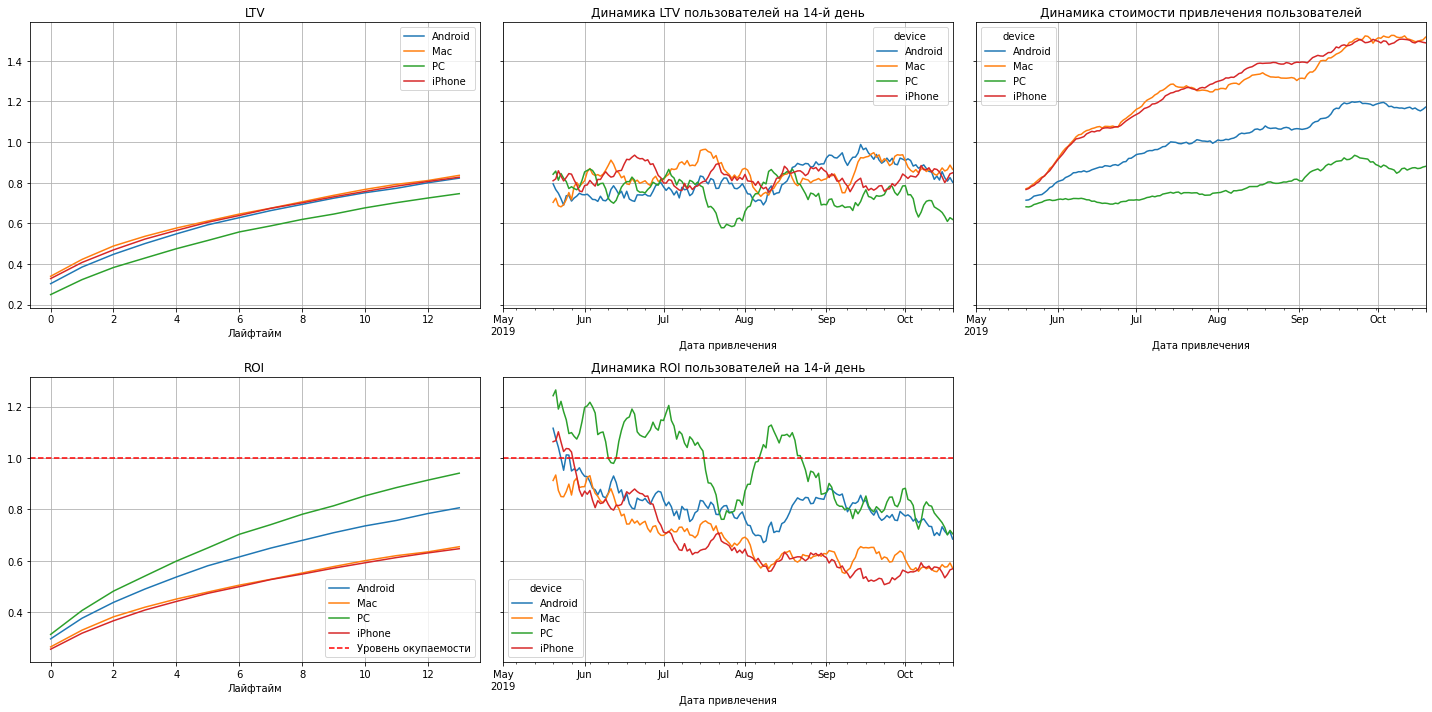

In [37]:
dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions = dimensions)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window = 20) 

- Самыми дорогими по стоимости привлечения пользвателей являются платформы Mac и iPhone: они лидируют не только по абсолютным значениям САС, но и по динамике его роста со временем. При этом они не окупаются, их POI в конце лайфтайма достигает порядка 70%.
- Остальные платформы тоже не окупаются, хотя у пользователей PC первые несколько месяцев периодна анализа наблюдалсся положительный ROI. Возможно, на самой плтформе возникли трудности и из-за этого ROI упал?

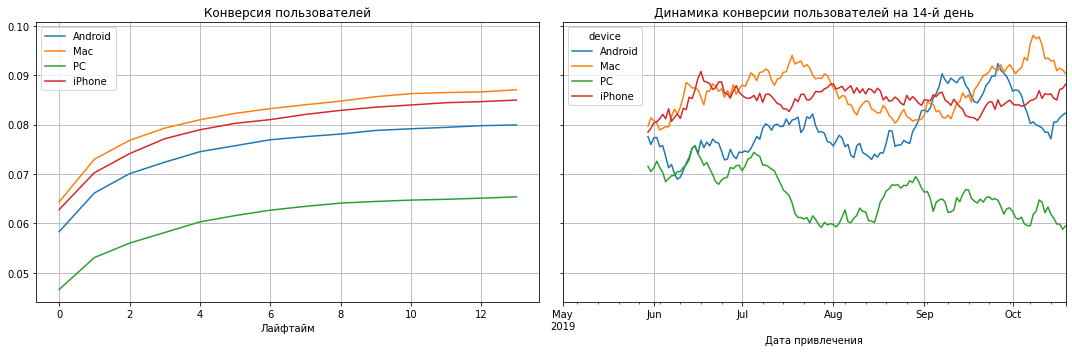

In [38]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions = dimensions)

plot_conversion(conversion_grouped, conversion_history, horizon_days, window = 30) 

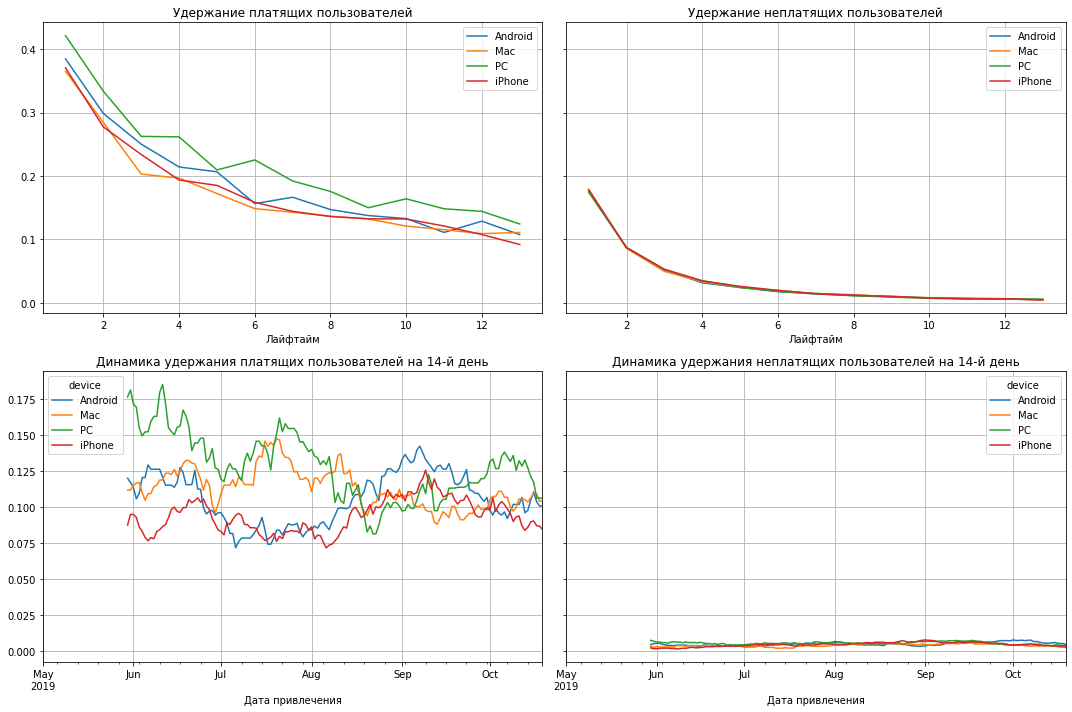

In [39]:
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions = dimensions)

plot_retention(retention_grouped, retention_history, horizon_days, window = 30) 

- Пользователи со всех устройств в целом демонстрируют стабильную динамику конверсии. Лучше всего конвертируются пользователи Mac и iPhone, но стоит не забывать, что и их привлчение обходится дороже, чем на других устройствах.
- Динамика удержания так же в целом стабильна, пользователи с PC удерживаются лучше, чем на остальных платформах. 

**Промежуточные итоги:** Можно сделать вывод, что проблемы с окупаемостью рекламы не связаны с техническими неисправностями разных платформ. Пользователи Mac и iPhone конвертируются лучше всего, но самые дорогие и, вероятно, из-за этого не окупаются. Пользователи PC - единственные, которые окупаются за период лайфтайма. Их привлечение стоит дешевле и они дольше удерживаются.

### Окупаемость рекламы с разбивкой по странам

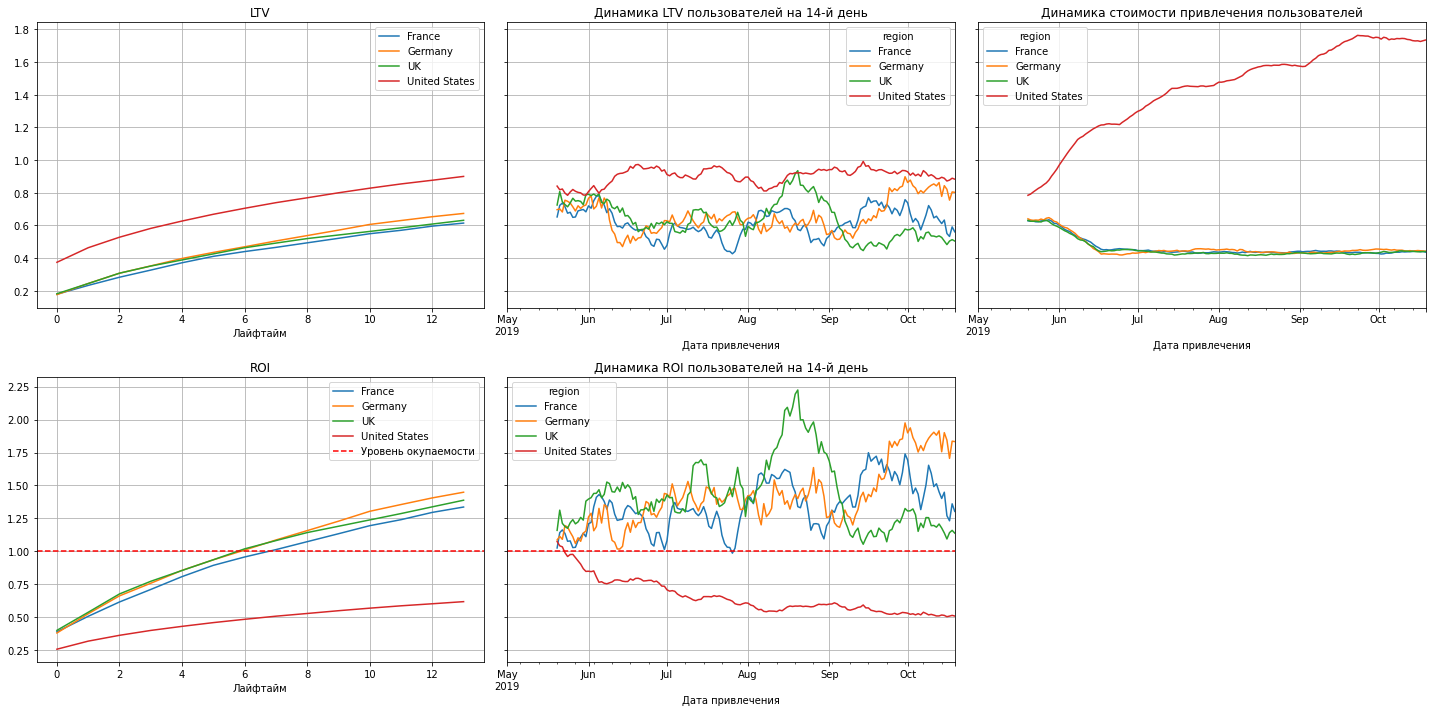

In [40]:
dimensions = ['region']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions = dimensions)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window = 20) 

- Не смотря на то, что LTV у пользователей США выше других регионов, реклама в нём совсем не окупается: на 14-й день ROI составляет порядка 70%. Это связано с постоянным увеличением затрат на рекламу в данном регионе: получается, что качество пользователей стабильно и не падает, но с каждым месяцем стоимость привлечения пользователя сильно возрастает.
- В останых регионах пользователи окупаются уже через 4-6 дней, а стоимость их привлечения остается стабильной на протяжении всего периода. 

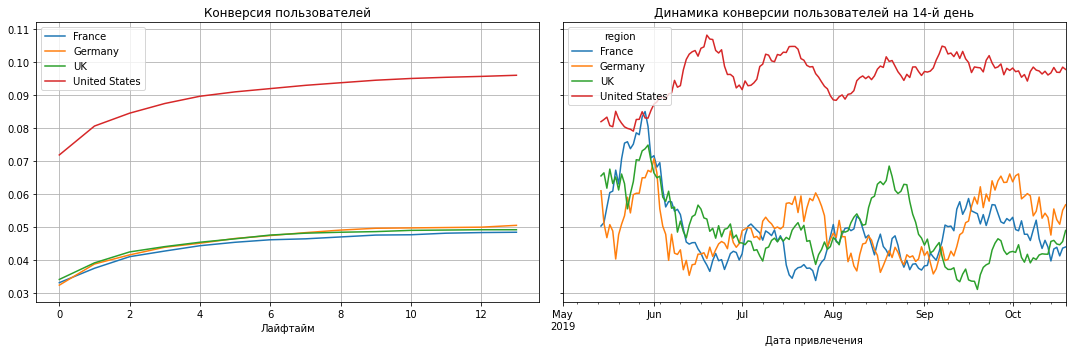

In [41]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions = dimensions)

plot_conversion(conversion_grouped, conversion_history, horizon_days, window = 14) 

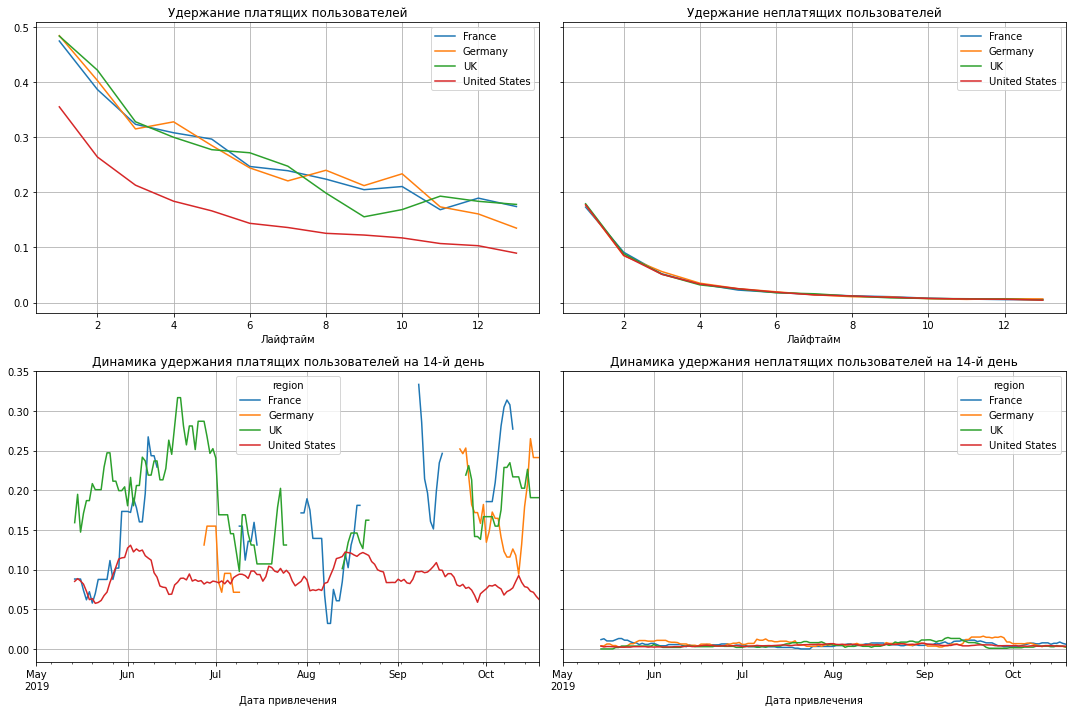

In [42]:
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions = dimensions)

plot_retention(retention_grouped, retention_history, horizon_days, window = 14) 

- Конверсия пользователей из США на порядок выше, чем у пользователей из других регионов. Однако удерживаются они хуже, чем остальные. Вероятно, они более легко совершают покупки, но и чаще забрасываают приложение.

**Промежуточные итоги:** все регионы, кроме США, демонстрируют схожие показатели и динамику. Сильно выделяются только пользователи из США: их LTV выше и конвертируются они лучше, но стоимость привлечения постоянно увеличивается, а удержание меньше остальных регионов. Из-за этого даже в конце лайтайма они не окупаются.

### Окупаемость рекламы с разбивкой по рекламным каналам

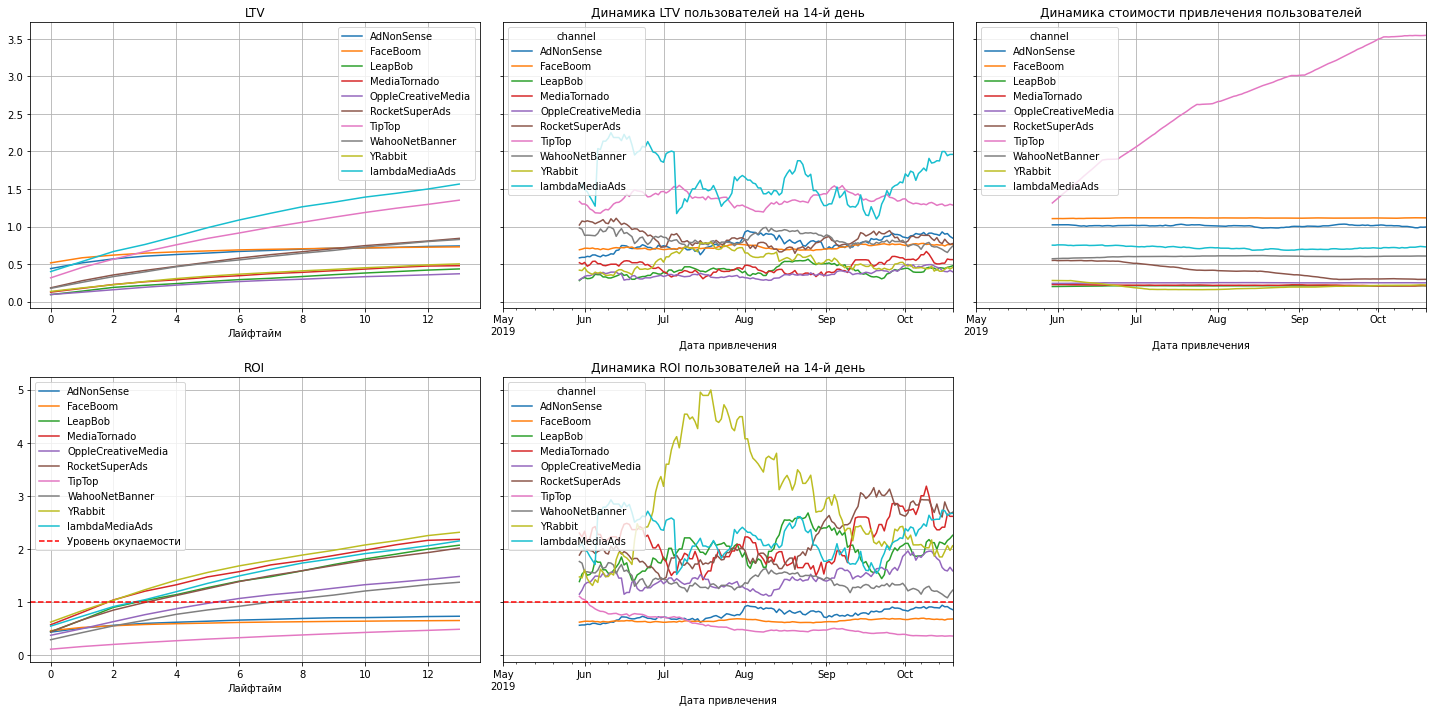

In [43]:
dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions = dimensions)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window = 30) 

- Самыми перспективными по LTV являются каналы lambdaMediaAds, TipTop, RocketSuperAds, AdNonSense. Динамика LTV в целом у всех каналов стабильная.
- Не смотря на самый высокий LTV, у канала TipTop постоянно растет стоимость привлечения пользователей, в то время как у останых каналов она остается постоянной.
- Большая часть каналов окупается уже на 6 день, исключения - TipTop, FaceBoom, AdNonSense: затраты на рекламу в них не окупаются вообще. Самыми перспективными по ROI можно назвать каналы YRabbit, MediaTornado, RocketSuperAd, lambdaMediaAds; все пользователи оттуда окупаются уже на второй день, а на 14-й процент окупаемости составляет более 200%.

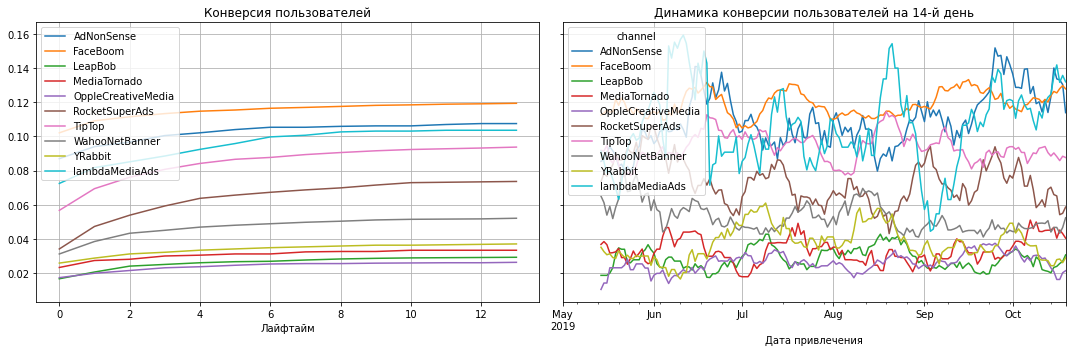

In [44]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions = dimensions)

plot_conversion(conversion_grouped, conversion_history, horizon_days, window = 14) 

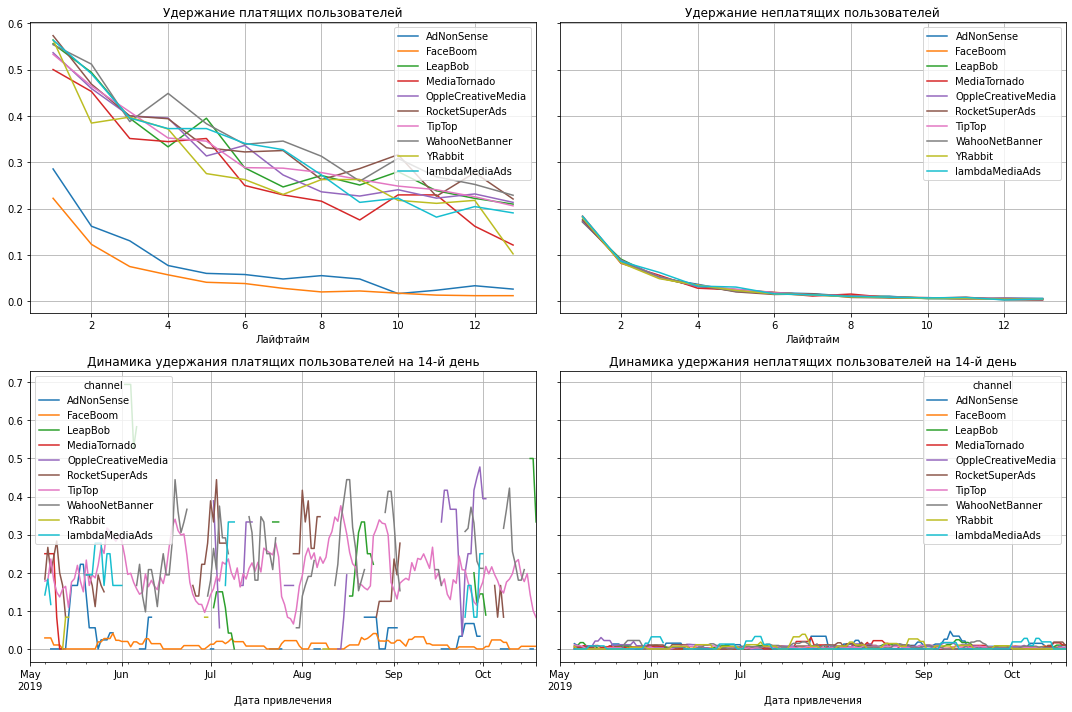

In [45]:
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions = dimensions)

plot_retention(retention_grouped, retention_history, horizon_days, window = 6) 

- Лучше всего конвертируются в платящих пользователи из каналов FaceBoom, AdNonSense, lambdaMediaAds. У всех каналов привлечения динамика конверсии в целом стабильная, за исключением lambdaMediaAds.
- Однако, как и в случае с пользователями США, у FaceBoom и AdNonSense показатели удержания существенно ниже других каналов, не смотря на высокую конверсию. 


**Промежуточные итоги:** каналы TipTop, FaceBoom, AdNonSense не окупают затраты на рекламу. При этом у них всех высокие показатели конверсии по сравнению с другими каналами, но при этом у TipTop и AdNonSense показатели удержания существенно ниже остальных.

## Выводы

Основными причинами неокупаемости рекламной акции являются неправильное распределение средств между каналами привлечения, а также особенности отдельных регионов и устройств. На данный момент рекламная компания в целом не окупается: ROI  в конце недели составляет примерно 98%. Можно выделить следующие основные проблемы: 

1. **Вложение средств в неправильные каналы привлечения**. Так, на данный момент больше всего средств уходит на каналы привлечения TipTop и FaceBoom. С них приходит больше всего платящих пользователей, однако конвернтируются они в платящх хуже, чем пользователи из других источников. Более того, затраты на рекламу в них не окупаются вообще, в отличие от других каналов привлечения, которые окупаются со 2 по 6 дни. Также стоит выделить существеннро более низкие показатели удержания на FaceBoom и AdNonSense. Помимо этого, у TipTop постоянно растет САС, в среднем раз в месяц он увеличивается примерно на 0.5. Таким образом, рекомендуется:

    - *Снизить вложения на рекламу по каналам TipTop и FaceBoom.*
    - *Стоит обратить внимание на другие каналы привлечения, такие как YRabbit, MediaTornado, RocketSuperAd.* Их ROI на 14-й день лайфтайма составляет более 200%, а пользователи лучше всего конвертируются в платящих.


2. **Слишком активное привлечение пользователей из США**. Не смотря на то, что пользователи из США составляют осноную базу приложения и процент плятящих среди всех пользователей там выше, чем в других регионах, на рекламную компанию там уходит на порядок больше средств и с каждым месяцем затраты только увеличиваются, что приводит к полной неокупаемости рекламы. Таким образом, рекомендуется:

    - *Проводить более активные рекламные компании в других регионах, а в США наоборот снизить активность или найти другой канал привлечения*. Вероятнее всего, в США пользователи привлекаются по каналу TipTop, который обходится компании слишком дорого и не окупается. Во всех останых регионах реклама окупается в среднем на 6 день, а затраны на неё остаются стабильными на протяжении всего времени.
    

3. **Платформы**. Четких выводов по платформам сделать нельзя: пользователи в целом рампределены по ним равномено, удержание и LTV также примерно на одном уровне. Самыми неокупающимися платформами являются MAC и iPhone.

    - *Стоит уделить больше внимания платформам Android и PC.* Не смотря на неокупаемость в целом, пользователи PC в начале анализа имели положительный ROI при относительно небольших затратах на рекламу. Однако, стоит учитывать что конвертируются они хуже всего.
    



